<a href="https://colab.research.google.com/github/Aravindlakki/Gen-AI-2025/blob/main/gen_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating poster for: Health
Saved poster to: blog_posters_small/health_poster_small.png
Displaying poster for: Health



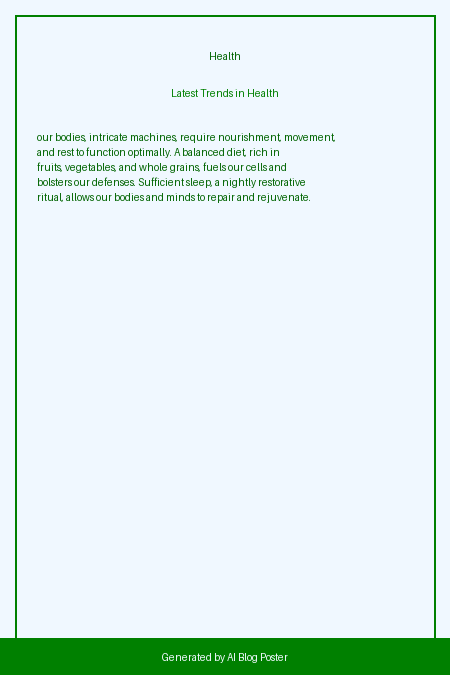
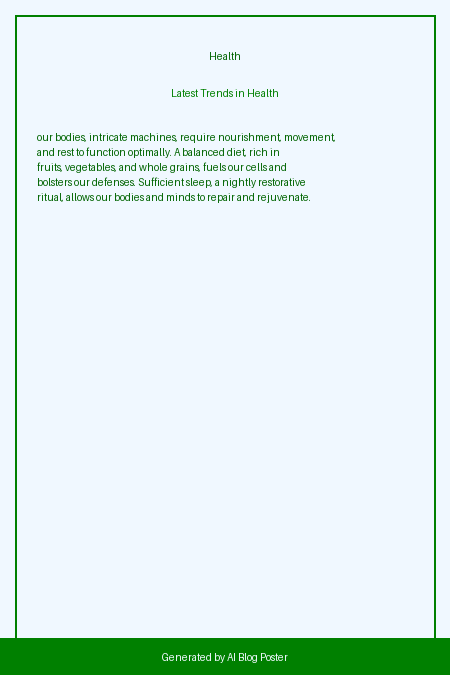

Generating poster for: Tech
Saved poster to: blog_posters_small/tech_poster_small.png
Displaying poster for: Tech



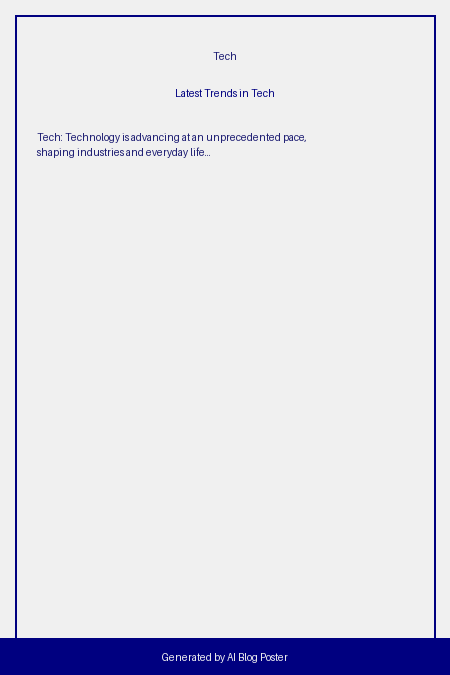
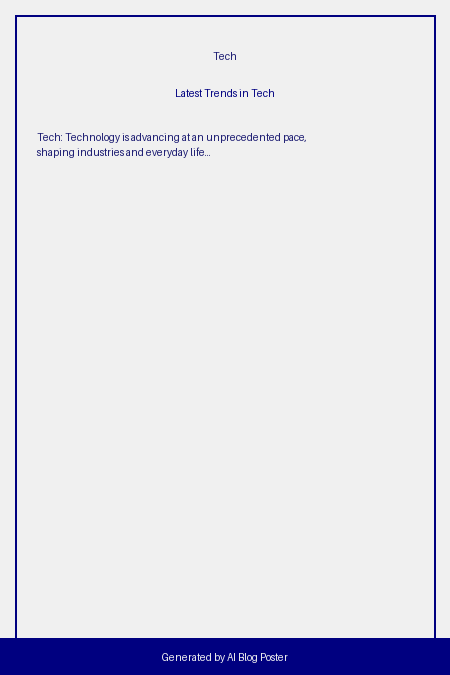

Generating poster for: Travel
Saved poster to: blog_posters_small/travel_poster_small.png
Displaying poster for: Travel



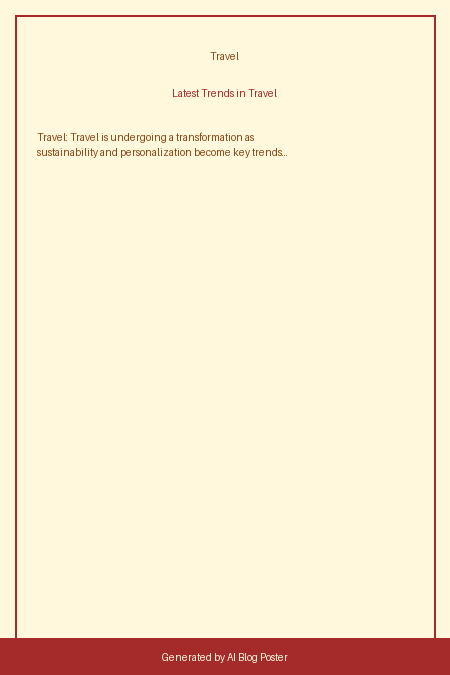
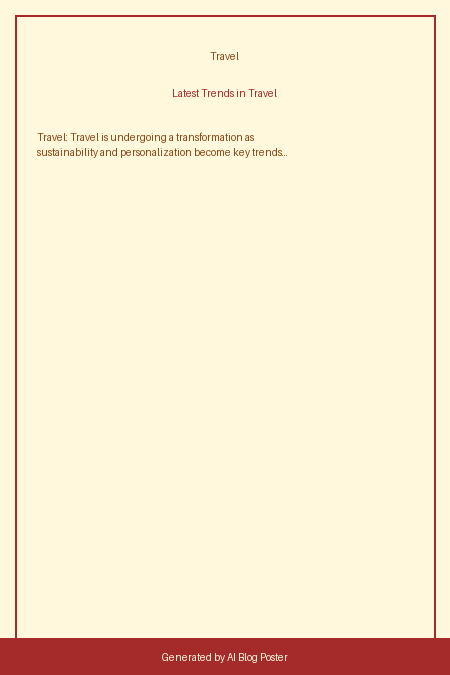

All posters generated and displayed with download links!


In [3]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
from PIL import Image, ImageDraw, ImageFont, ImageOps
import matplotlib.pyplot as plt
import textwrap
import os
from io import BytesIO
from IPython.display import display, HTML
import base64

# Install transformers if not already installed
try:
    from transformers import T5Tokenizer, T5ForConditionalGeneration
except ImportError:
    print("Installing transformers library...")
    import subprocess
    subprocess.run(["pip", "install", "transformers"])
    from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load dataset
data = {
    "title": ["Health", "Tech", "Travel"],
    "description": [
        "Health, a state of complete well-being, transcends the mere absence of disease. It's a dynamic equilibrium of physical, mental, and social vitality, a cornerstone of a fulfilling existence. Our bodies, intricate machines, require nourishment, movement, and rest to function optimally. A balanced diet, rich in fruits, vegetables, and whole grains, fuels our cells and bolsters our defenses. Regular physical activity, from brisk walks to vigorous workouts, strengthens our muscles, improves cardiovascular health, and elevates our mood. Sufficient sleep, a nightly restorative ritual, allows our bodies and minds to repair and rejuvenate..",
        "Technology is advancing at an unprecedented pace, shaping industries and everyday life...",
        "Travel is undergoing a transformation as sustainability and personalization become key trends..."
    ]
}
df = pd.DataFrame(data)

# Initialize T5 model for text generation
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

def generate_blog_content(topic, description):
    """Generate blog content using T5 model"""
    input_text = f"write a 100-word blog post about {topic}: {description}"
    input_ids = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

def create_poster(title, content, theme="health", small=True):
    """Create a styled poster image"""
    # Set base dimensions
    base_width, base_height = 600, 900  # Smaller base dimensions

    # Scale down further if 'small' is True
    scale_factor = 0.75 if small else 1
    width, height = int(base_width * scale_factor), int(base_height * scale_factor)

    # Set colors based on theme
    if theme == "health":
        bg_color = (240, 248, 255)  # AliceBlue
        text_color = (0, 100, 0)  # DarkGreen
        accent_color = (0, 128, 0)  # Green
    elif theme == "tech":
        bg_color = (240, 240, 240)  # WhiteSmoke
        text_color = (25, 25, 112)  # MidnightBlue
        accent_color = (0, 0, 128)  # Navy
    else:  # travel
        bg_color = (255, 248, 220)  # Cornsilk
        text_color = (139, 69, 19)  # SaddleBrown
        accent_color = (165, 42, 42)  # Brown

    # Create blank image
    img = Image.new("RGB", (width, height), bg_color)
    draw = ImageDraw.Draw(img)

    # Add decorative border
    border_size = int(20 * scale_factor)
    draw.rectangle([border_size, border_size, width-border_size, height-border_size],
                  outline=accent_color, width=int(3 * scale_factor))

    # Load fonts (fallback to default if not available)
    try:
        title_font = ImageFont.truetype("arialbd.ttf", int(40 * scale_factor))
        subtitle_font = ImageFont.truetype("arial.ttf", int(20 * scale_factor))
        body_font = ImageFont.truetype("arial.ttf", int(16 * scale_factor))
    except IOError:
        title_font = ImageFont.load_default()
        subtitle_font = ImageFont.load_default()
        body_font = ImageFont.load_default()

    # Add title
    draw.text((width//2, int(75 * scale_factor)), title, fill=text_color, font=title_font, anchor="mm")

    # Add subtitle
    subtitle = f"Latest Trends in {title}"
    draw.text((width//2, int(125 * scale_factor)), subtitle, fill=accent_color, font=subtitle_font, anchor="mm")

    # Add content (with text wrapping)
    text_width = width - 2 * int(50 * scale_factor)
    char_width = body_font.getlength("A") # Approximate character width
    max_chars_per_line = int(text_width // char_width)
    lines = textwrap.wrap(content, width=max_chars_per_line)
    y_position = int(175 * scale_factor)
    line_height = int(20 * scale_factor)
    for line in lines:
        draw.text((int(50 * scale_factor), y_position), line, fill=text_color, font=body_font)
        y_position += line_height

    # Add decorative footer
    footer_height = int(50 * scale_factor)
    draw.rectangle([0, height-footer_height, width, height], fill=accent_color)
    draw.text((width//2, height-int(25 * scale_factor)), "Generated by AI Blog Poster",
             fill=bg_color, font=subtitle_font, anchor="mm")

    return img

def display_image_download_link(img, filename):
    """Displays the image and provides a download link."""
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()

    display(HTML(f'''
        <img src="data:image/png;base64,{img_str}" style="max-width: 50%; height: auto;"><br>
        <a href="data:image/png;base64,{img_str}" download="{filename}">Download Poster</a>
    '''))

# Generate and display posters for each topic
output_dir = "blog_posters_small"
os.makedirs(output_dir, exist_ok=True)

for index, row in df.iterrows():
    print(f"Generating poster for: {row['title']}")

    # Generate blog content
    blog_content = generate_blog_content(row['title'], row['description'])

    # Create smaller poster
    poster = create_poster(row['title'], blog_content, theme=row['title'].lower(), small=True)

    # Save the poster
    filename = f"{row['title'].lower()}_poster_small.png"
    poster_path = os.path.join(output_dir, filename)
    poster.save(poster_path)
    print(f"Saved poster to: {poster_path}")

    # Display the poster with a download link
    print(f"Displaying poster for: {row['title']}")
    display_image_download_link(poster, filename)

print("All posters generated and displayed with download links!")